Aubrey Winger, N1 Technical Assessment

Importing the Datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
xls = pd.ExcelFile('FoodEnvironmentAtlas.xls')
df1 = pd.read_excel(xls, 'Supplemental Data - County')
df2 = pd.read_excel(xls, 'ACCESS')
df3 = pd.read_excel(xls, 'STORES')
df4 = pd.read_excel(xls, 'RESTAURANTS')
df5 = pd.read_excel(xls, 'ASSISTANCE')
df6 = pd.read_excel(xls, 'TAXES')
df7 = pd.read_excel(xls, 'LOCAL')
df8 = pd.read_excel(xls, 'HEALTH')
df9 = pd.read_excel(xls, 'SOCIOECONOMIC')
df10 = pd.read_excel(xls, 'INSECURITY')

I've read in all the food insecurity datasets from the Excel sheet, now I am going to extract the useful variables based on the variable descriptions

Generally, I am only going to use percentages, not raw counts

ACCESS

In [3]:
access_train = df2[['FIPS','State','County','PCT_LACCESS_POP10','PCT_LACCESS_POP15','PCT_LACCESS_LOWI10',
             'PCT_LACCESS_LOWI15','PCT_LACCESS_HHNV10','PCT_LACCESS_HHNV15',
             'PCT_LACCESS_SNAP15','PCT_LACCESS_CHILD10',
            'PCT_LACCESS_CHILD15', 'PCT_LACCESS_SENIORS10',
            'PCT_LACCESS_SENIORS15','PCT_LACCESS_WHITE15', 
             'PCT_LACCESS_BLACK15','PCT_LACCESS_HISP15',
            'PCT_LACCESS_NHASIAN15','PCT_LACCESS_NHNA15','PCT_LACCESS_NHPI15','PCT_LACCESS_MULTIR15']]
access_label = df2[['FIPS','State','County','PCT_LACCESS_POP15']]

STORES (using values scaled to population)

In [4]:
stores = df3[['FIPS','State','County','GROCPTH11','GROCPTH16',
             'SUPERCPTH11','SUPERCPTH16',
             'CONVSPTH11','CONVSPTH16',
             'SPECSPTH11','SPECSPTH16',
             'SNAPSPTH12','SNAPSPTH17',
             'WICSPTH11','WICSPTH16']]

In [5]:
resturants = df4[['FIPS','State','County','FFRPTH11','FFRPTH16',
                 'FSRPTH11','FSRPTH16',
                 'PC_FFRSALES07','PC_FFRSALES12','PC_FSRSALES07','PC_FSRSALES12']]

In [6]:
assistance = df5[['FIPS','State','County','PCT_SNAP12','PCT_SNAP17',
                 'PC_SNAPBEN12','PC_SNAPBEN17',
                 'SNAP_PART_RATE11','SNAP_PART_RATE16',
                'PCT_NSLP12','PCT_NSLP17',
                 'PCT_FREE_LUNCH10','PCT_FREE_LUNCH15',
                 'PCT_REDUCED_LUNCH10','PCT_REDUCED_LUNCH15',
                 'PCT_SBP12','PCT_SBP17','PCT_SFSP12',
                 'PCT_SFSP17','PC_WIC_REDEMP11',
                 'PC_WIC_REDEMP16','PCT_WIC12','PCT_WIC17',
                 'PCT_WICINFANTCHILD14','PCT_WICINFANTCHILD16','PCT_WICWOMEN14',
                  'PCT_WICWOMEN16','PCT_CACFP12','PCT_CACFP17'
                 ]]

In [7]:
insecurity = df10[['FIPS','State','County','FOODINSEC_12_14','FOODINSEC_15_17','VLFOODSEC_12_14','VLFOODSEC_15_17']]

In [8]:
local = df7[['FIPS','State','County','PCT_LOCLFARM07','PCT_LOCLFARM12','PCT_LOCLSALE07',
             'PCT_LOCLSALE12','PC_DIRSALES07','PC_DIRSALES12',
            'FMRKTPTH13','FMRKTPTH18','PCT_FMRKT_SNAP18','PCT_FMRKT_WIC18',
            'PCT_FMRKT_WICCASH18','PCT_FMRKT_SFMNP18','PCT_FMRKT_CREDIT18','PCT_FMRKT_FRVEG18','PCT_FMRKT_ANMLPROD18',
            'PCT_FMRKT_BAKED18','PCT_FMRKT_OTHERFOOD18','VEG_ACRESPTH07','VEG_ACRESPTH12','FRESHVEG_ACRESPTH07','FRESHVEG_ACRESPTH12',
            'ORCHARD_ACRESPTH07','ORCHARD_ACRESPTH12','BERRY_ACRESPTH07','BERRY_ACRESPTH12','GHVEG_SQFTPTH07','GHVEG_SQFTPTH12']]

In [9]:
health = df8[['FIPS','State','County','PCT_DIABETES_ADULTS08',
            'PCT_DIABETES_ADULTS13',
            'PCT_OBESE_ADULTS12',
            'PCT_OBESE_ADULTS17',
            'PCT_HSPA17',
             'RECFACPTH11',
            'RECFACPTH16']]

In [10]:
socioeco = df9[['FIPS','State','County','PCT_NHWHITE10',
                'PCT_NHBLACK10',
                'PCT_HISP10',
                'PCT_NHASIAN10',
                'PCT_NHNA10',
                'PCT_NHPI10',
                'PCT_65OLDER10',
                'PCT_18YOUNGER10',
               'POVRATE15','CHILDPOVRATE15']]

Next, all the data needs to be merged back together

In [116]:
#dataframe = pd.merge(access,stores)
dataframe = pd.merge(access_label,stores)
dataframe = pd.merge(dataframe, resturants)
dataframe = pd.merge(dataframe,assistance)
dataframe = pd.merge(dataframe,insecurity)
dataframe = pd.merge(dataframe, local)
dataframe = pd.merge(dataframe, health)
dataframe = pd.merge(dataframe,socioeco)

In [117]:
dataframe.shape

(3143, 98)

In [118]:
dataframe.head(10)

,FIPS,State,County,PCT_LACCESS_POP15,GROCPTH11,GROCPTH16,SUPERCPTH11,SUPERCPTH16,CONVSPTH11,CONVSPTH16,...,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,POVRATE15,CHILDPOVRATE15
0,1001,AL,Autauga,32.062255,0.090581,0.054271,0.018116,0.018090,0.561604,0.560802,...,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,12.7,18.8
1,1003,AL,Baldwin,16.767489,0.144746,0.139753,0.032166,0.033733,0.573622,0.568650,...,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,12.9,19.6
2,1005,AL,Barbour,22.105560,0.219370,0.155195,0.000000,0.038799,0.804358,0.737177,...,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,32.0,45.2
3,1007,AL,Bibb,4.230324,0.263794,0.220916,0.043966,0.044183,0.835348,0.662749,...,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,22.2,29.3
4,1009,AL,Blount,6.497380,0.121608,0.086863,0.017373,0.017373,0.521177,0.469059,...,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,14.7,22.2
5,1011,AL,Bullock,37.950342,0.187354,0.287329,0.000000,0.000000,0.187354,0.574658,...,21.916804,69.974345,7.119296,0.183251,0.183251,0.036650,13.459776,22.264981,39.6,51.2
6,1013,AL,Butler,6.226805,0.143678,0.150263,0.047893,0.050088,1.053640,1.101928,...,54.060247,43.189956,0.911825,0.830668,0.281663,0.033418,16.656323,24.137108,25.8,36.0
7,1015,AL,Calhoun,23.433852,0.203761,0.234823,0.025470,0.034789,0.738634,0.730562,...,73.613501,20.390143,3.283237,0.699997,0.404817,0.079277,14.328847,22.877239,20.0,30.7
8,1017,AL,Chambers,20.843214,0.235080,0.207610,0.029385,0.029659,0.764009,0.652490,...,58.141166,38.597107,1.566564,0.485167,0.166594,0.020459,16.676896,22.513517,22.4,34.4
9,1019,AL,Cherokee,0.398332,0.153888,0.194054,0.038472,0.038811,0.654022,0.698595,...,92.073570,4.640425,1.231290,0.188541,0.469429,0.003848,17.896033,21.416753,19.4,30.2


I'm going to store the State and County Key for FIPS in a separate dataframe, then drop State and Country so all my data is numeric

In [119]:
location_key = dataframe[['FIPS','State','County']]
dataframe = dataframe.drop(['State','County'],axis=1)

In [15]:
dataframe.head(10)

,FIPS,PCT_LACCESS_POP15,GROCPTH11,GROCPTH16,SUPERCPTH11,SUPERCPTH16,CONVSPTH11,CONVSPTH16,SPECSPTH11,SPECSPTH16,...,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,POVRATE15,CHILDPOVRATE15
0,1001,32.062255,0.090581,0.054271,0.018116,0.018090,0.561604,0.560802,0.018116,0.018090,...,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,12.7,18.8
1,1003,16.767489,0.144746,0.139753,0.032166,0.033733,0.573622,0.568650,0.107219,0.130115,...,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,12.9,19.6
2,1005,22.105560,0.219370,0.155195,0.000000,0.038799,0.804358,0.737177,0.109685,0.077598,...,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,32.0,45.2
3,1007,4.230324,0.263794,0.220916,0.043966,0.044183,0.835348,0.662749,0.000000,0.000000,...,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,22.2,29.3
4,1009,6.497380,0.121608,0.086863,0.017373,0.017373,0.521177,0.469059,0.017373,0.000000,...,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,14.7,22.2
5,1011,37.950342,0.187354,0.287329,0.000000,0.000000,0.187354,0.574658,0.093677,0.000000,...,21.916804,69.974345,7.119296,0.183251,0.183251,0.036650,13.459776,22.264981,39.6,51.2
6,1013,6.226805,0.143678,0.150263,0.047893,0.050088,1.053640,1.101928,0.000000,0.000000,...,54.060247,43.189956,0.911825,0.830668,0.281663,0.033418,16.656323,24.137108,25.8,36.0
7,1015,23.433852,0.203761,0.234823,0.025470,0.034789,0.738634,0.730562,0.016980,0.008697,...,73.613501,20.390143,3.283237,0.699997,0.404817,0.079277,14.328847,22.877239,20.0,30.7
8,1017,20.843214,0.235080,0.207610,0.029385,0.029659,0.764009,0.652490,0.029385,0.029659,...,58.141166,38.597107,1.566564,0.485167,0.166594,0.020459,16.676896,22.513517,22.4,34.4
9,1019,0.398332,0.153888,0.194054,0.038472,0.038811,0.654022,0.698595,0.038472,0.000000,...,92.073570,4.640425,1.231290,0.188541,0.469429,0.003848,17.896033,21.416753,19.4,30.2


In [16]:
 from sklearn.impute import SimpleImputer

In [17]:
dataframe.replace({-9999:np.nan},inplace=True)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dataframe_cleaned = imp_mean.fit_transform(dataframe)

In [18]:
clean_data =  pd.DataFrame(dataframe_cleaned,columns=dataframe.columns)

In [19]:
clean_data.head(10)

,FIPS,PCT_LACCESS_POP15,GROCPTH11,GROCPTH16,SUPERCPTH11,SUPERCPTH16,CONVSPTH11,CONVSPTH16,SPECSPTH11,SPECSPTH16,...,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,POVRATE15,CHILDPOVRATE15
0,1001.0,32.062255,0.090581,0.054271,0.018116,0.018090,0.561604,0.560802,0.018116,0.018090,...,77.246156,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,12.7,18.8
1,1003.0,16.767489,0.144746,0.139753,0.032166,0.033733,0.573622,0.568650,0.107219,0.130115,...,83.504787,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,12.9,19.6
2,1005.0,22.105560,0.219370,0.155195,0.000000,0.038799,0.804358,0.737177,0.109685,0.077598,...,46.753105,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,32.0,45.2
3,1007.0,4.230324,0.263794,0.220916,0.043966,0.044183,0.835348,0.662749,0.000000,0.000000,...,75.020729,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,22.2,29.3
4,1009.0,6.497380,0.121608,0.086863,0.017373,0.017373,0.521177,0.469059,0.017373,0.000000,...,88.887338,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,14.7,22.2
5,1011.0,37.950342,0.187354,0.287329,0.000000,0.000000,0.187354,0.574658,0.093677,0.000000,...,21.916804,69.974345,7.119296,0.183251,0.183251,0.036650,13.459776,22.264981,39.6,51.2
6,1013.0,6.226805,0.143678,0.150263,0.047893,0.050088,1.053640,1.101928,0.000000,0.000000,...,54.060247,43.189956,0.911825,0.830668,0.281663,0.033418,16.656323,24.137108,25.8,36.0
7,1015.0,23.433852,0.203761,0.234823,0.025470,0.034789,0.738634,0.730562,0.016980,0.008697,...,73.613501,20.390143,3.283237,0.699997,0.404817,0.079277,14.328847,22.877239,20.0,30.7
8,1017.0,20.843214,0.235080,0.207610,0.029385,0.029659,0.764009,0.652490,0.029385,0.029659,...,58.141166,38.597107,1.566564,0.485167,0.166594,0.020459,16.676896,22.513517,22.4,34.4
9,1019.0,0.398332,0.153888,0.194054,0.038472,0.038811,0.654022,0.698595,0.038472,0.000000,...,92.073570,4.640425,1.231290,0.188541,0.469429,0.003848,17.896033,21.416753,19.4,30.2


I am now going to split the data into train and test sets. Since we are attempting to determine what locations have high need for food access, my target variable is percentage of the population with low access to stores in 2015, which is the most recent data collection point. 

In [20]:
label = clean_data[['PCT_LACCESS_POP15']]
clean_data = clean_data.drop('PCT_LACCESS_POP15',axis=1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_features, test_features, train_labels, test_labels = train_test_split(np.array(clean_data), np.array(label), test_size=0.2,random_state=42)

I have decided to use the random forest regressor for this analysis, since it determines feature importance.

I am using RandomizedSearch for hyperparameter tuning. If I had more time, I would have also implemented GridSearch on values around the best parameters generated by RandomizedSearch.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 150, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 4, 6, 10]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
train_labels.shape

(2514, 1)

In [26]:
test_labels.shape

(629, 1)

In [27]:
train_labels = np.reshape(train_labels,(2514,)) 
test_labels = np.reshape(test_labels,(629,))

In [28]:
random_forest = RandomForestRegressor()
tuning = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid,
                           n_iter=100,cv=3,random_state=42,n_jobs=-1,verbose=2)

In [29]:
tuning.fit(train_features,train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=45, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=575; total time= 3.3min
[CV] END bootstrap=True, max_depth=150, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1050; total time= 2.6min
[CV] END bootstrap=True, max_depth=45, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1525; total time=  34.8s
[CV] END bootstrap=False, max_depth=115, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=13.5min


/Users/aubrey/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=150, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   2.1s
[CV] END bootstrap=True, max_depth=45, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=575; total time= 2.6min
[CV] END bootstrap=False, max_depth=150, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  36.4s
[CV] END bootstrap=True, max_depth=150, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1050; total time= 2.5min
[CV] END bootstrap=True, max_depth=45, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1525; total time=  36.3s
[CV] END bootstrap=False, max_depth=115, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=13.7min
[CV] END bootstrap=True, max_depth=150, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_dept

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 45, 80, 115, 150,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 575, 1050, 1525,
                                                         2000]},
                   random_state=42, verbose=2)

In [54]:
tuning.best_params_

{'n_estimators': 575,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [55]:
best_grid = tuning.best_estimator_
predictions = best_grid.predict(test_features)

In [56]:
predictions.shape

(629,)

In [57]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_labels,predictions))

13.661939014815186

The root mean squared error is 13.66%, which means the mean error for my model is about a 13.66% difference from the true percentage. 

In [65]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_labels,predictions)

9.78543040971942

In [66]:
importances = list(best_grid.feature_importances_)

In [74]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(clean_data.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances[0:20]

[('GROCPTH16', 0.05),
 ('FFRPTH11', 0.05),
 ('FFRPTH16', 0.05),
 ('GROCPTH11', 0.04),
 ('PCT_NHBLACK10', 0.04),
 ('CONVSPTH11', 0.03),
 ('WICSPTH16', 0.03),
 ('PCT_NHASIAN10', 0.03),
 ('CONVSPTH16', 0.02),
 ('SNAPSPTH12', 0.02),
 ('SNAPSPTH17', 0.02),
 ('WICSPTH11', 0.02),
 ('BERRY_ACRESPTH12', 0.02),
 ('PCT_NHNA10', 0.02),
 ('FIPS', 0.01),
 ('SPECSPTH11', 0.01),
 ('SPECSPTH16', 0.01),
 ('FSRPTH11', 0.01),
 ('FSRPTH16', 0.01),
 ('PCT_SNAP12', 0.01)]

The most important features in determining access to stores are grocery stores per 1,000 population, fast food resturants per 1,000 population, percent of the population that is black, convenience stores per 1,000 population, WIC authorized stores per 1,000, and percent of the population that is Asian.

In [83]:
plotting_importance = pd.DataFrame(importances,columns=["Importance"])
plotting_importance['Features']=clean_data.columns

In [86]:
plotting_importance = plotting_importance.sort_values(by=['Importance'],ascending=False)

Text(0.5, 1.0, 'Variable Importances')

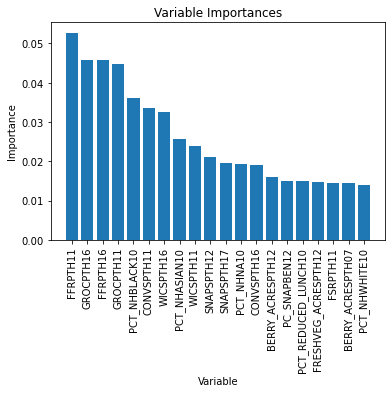

In [88]:
import matplotlib.pyplot as plt

x_values = list(range(20))

plt.bar(x_values, plotting_importance["Importance"].iloc[0:20], orientation = 'vertical')
plt.xticks(x_values, plotting_importance["Features"].iloc[0:20], rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

In [69]:
health_data

,YEAR,BENE_GEO_LVL,BENE_GEO_DESC,BENE_GEO_CD,BENE_AGE_LVL,BENES_WTH_PTAPTB_CNT,BENES_FFS_CNT,BENES_MA_CNT,MA_PRTCPTN_RATE,BENE_AVG_AGE,...,PQI11_BCTRL_PNA_AGE_LT_65,PQI11_BCTRL_PNA_AGE_65_74,PQI11_BCTRL_PNA_AGE_GE_75,PQI12_UTI_AGE_LT_65,PQI12_UTI_AGE_65_74,PQI12_UTI_AGE_GE_75,PQI15_ASTHMA_AGE_LT_40,PQI16_LWRXTRMTY_AMPUTN_AGE_LT_65,PQI16_LWRXTRMTY_AMPUTN_AGE_65_74,PQI16_LWRXTRMTY_AMPUTN_AGE_GE_75
0,2007,National,National,NaN,All,42286251,32872694,9413557,0.2226,72,...,981,815.0,2111.0,441,322.0,1234.0,420,124,49,55
1,2007,National,National,NaN,<65,6560776,5509342,1051434,0.1603,50,...,981,NaN,NaN,441,NaN,NaN,420,124,NaN,NaN
2,2007,National,National,NaN,>65,35725475,27363352,8362123,0.2341,76,...,NaN,815.0,2111.0,NaN,322.0,1234.0,NaN,NaN,49,55
3,2007,State,AK,2.0,All,53634,53203,431,0.008,70,...,853,858.0,1913.0,380,164.0,886.0,*,123,*,*
4,2007,State,AK,2.0,<65,9791,9729,62,0.0063,50,...,853,NaN,NaN,380,NaN,NaN,*,123,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46987,2020,County,WY-Teton,56039.0,All,3541,3308,233,0.0658,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46988,2020,County,WY-UNKNOWN,56999.0,All,*,*,*,*,*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46989,2020,County,WY-Uinta,56041.0,All,3440,2968,472,0.1372,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46990,2020,County,WY-Washakie,56043.0,All,1875,1845,30,0.016,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#take the 50 places with the highest percentage of low access to store, see the correlation between those and medicare usage

In [127]:
test_features.shape

(629, 95)

In [135]:
data_sorted = pd.DataFrame(test_labels,columns=["Actual"])
data_sorted["Predicted"] = predictions
data_sorted["FIPS"] = test_features[:,0]
location_test = location_key[location_key['FIPS'].isin(data_sorted['FIPS'])]

In [134]:
location_test

,FIPS,State,County
0,1001,AL,Autauga
14,1029,AL,Cleburne
17,1035,AL,Conecuh
22,1045,AL,Dale
25,1051,AL,Elmore
...,...,...,...
3110,55123,WI,Vernon
3128,56017,WY,Hot Springs
3133,56027,WY,Niobrara
3138,56037,WY,Sweetwater


In [136]:
data_sorted = data_sorted.sort_values(by=['Actual'],ascending=False)

Text(0.5, 1.0, 'Actual and Predicted Values for Areas with Lowest Store Access')

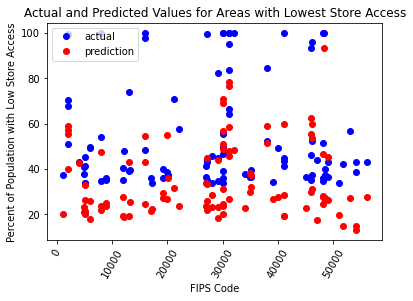

In [148]:
plt.plot(data_sorted['FIPS'][0:100],data_sorted['Actual'][0:100],'bo',label='actual')
plt.plot(data_sorted['FIPS'][0:100],data_sorted['Predicted'][0:100],'ro',label='prediction')
plt.xticks(rotation = '60'); 
plt.legend()
plt.xlabel('FIPS Code')
plt.ylabel('Percent of Population with Low Store Access')
plt.title('Actual and Predicted Values for Areas with Lowest Store Access')

The predicted values generally look like they are much lower than the actual values for percent of population with low store access.

In [173]:
health_data = pd.read_csv("Geographic Variation Public Use File State County.csv")

/var/folders/hj/gb9ys6v157s8rvf29qlct2hr0000gp/T/ipykernel_45783/642968701.py:1: DtypeWarning: Columns (225,229,230,232,233,234,237,238,240,241,243,244,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  health_data = pd.read_csv("Geographic Variation Public Use File State County.csv")


In [174]:
health_fips = pd.read_csv("Medicare_Geographic_Variation_by_National_State_County.csv")

In [143]:
import seaborn as sn

In [232]:
health_data_filtered = health_data[["BENES_WTH_PTAPTB_CNT","BENES_FFS_CNT","BENES_MA_CNT","MA_PRTCPTN_RATE","BENE_DUAL_PCT","BENE_AVG_RISK_SCRE","BENES_IP_PCT","IP_CVRD_STAYS_PER_1000_BENES","IP_CVRD_DAYS_PER_1000_BENES","ACUTE_HOSP_READMSN_PCT","BENES_ER_VISITS_PCT","OP_MDCR_PYMT_PCT","BENES_OP_PCT","ASC_MDCR_PYMT_PCT","ASC_MDCR_STDZD_PYMT_PCT"]]

In [233]:
health_data_filtered2 = pd.concat([health_fips, health_data_filtered], axis=1)

In [234]:
health_data_filtered2.rename(columns = {'BENE_GEO_CD':'FIPS'}, inplace = True)

In [235]:
health_data_filtered3 = health_data_filtered2[health_data_filtered2['FIPS'].isin(clean_data['FIPS'])]

In [236]:
health_data_filtered3 = pd.DataFrame(health_data_filtered3).reset_index(drop=True)

In [237]:
health_data_filtered3.replace({'*':np.nan},inplace=True)
imp_mean2 = SimpleImputer(missing_values=np.nan, strategy='mean')
health4 = imp_mean2.fit_transform(health_data_filtered3)
health4 = pd.DataFrame(health4,columns=health_data_filtered3.columns)

In [238]:
health4 = health4.groupby(['FIPS']).mean()

In [239]:
health4 = health4.reset_index(drop=True)
health4['PCT_LACCESS_POP15']= label

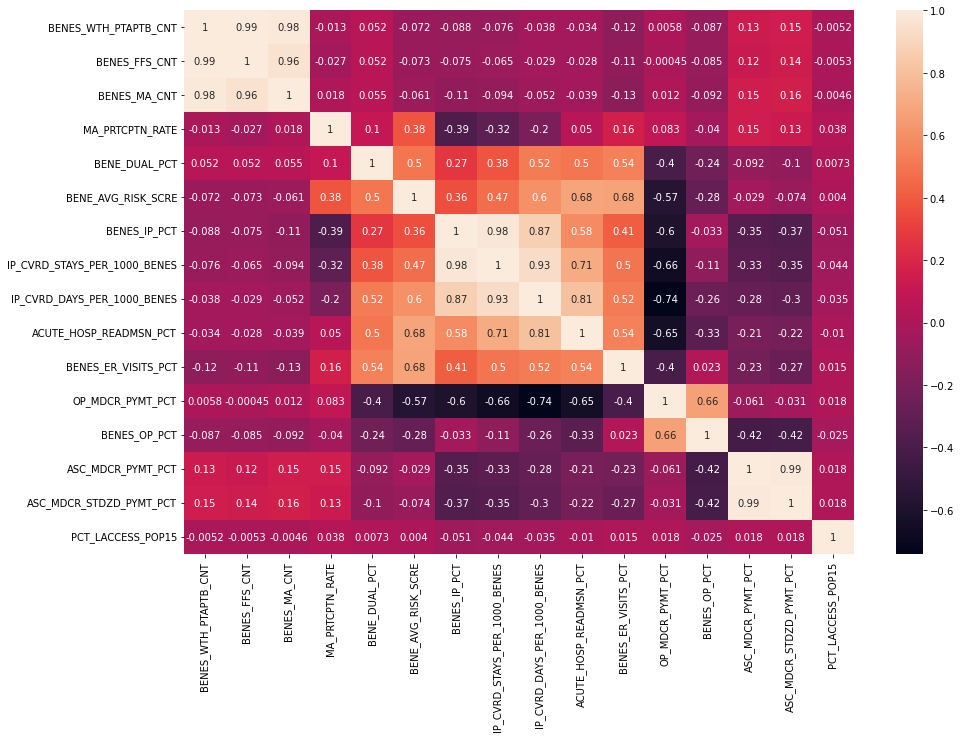

In [243]:
corr_matrix = health4.corr()
fig, ax = plt.subplots(figsize=(15,10))  
sn.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

I attempted to see if there were any correlations between percent of the population with low store access and Medicare usage, but there were no significant correlations. 

In [253]:
health_food =  pd.merge(access_label,health)
health_food.drop(['State','County','FIPS'],axis=1,inplace=True)
health_food.replace({-9999:np.nan},inplace=True)
imp_mean3 = SimpleImputer(missing_values=np.nan, strategy='mean')
health_food2 = imp_mean3.fit_transform(health_food)
health_food2 = pd.DataFrame(health_food2,columns=health_food.columns)

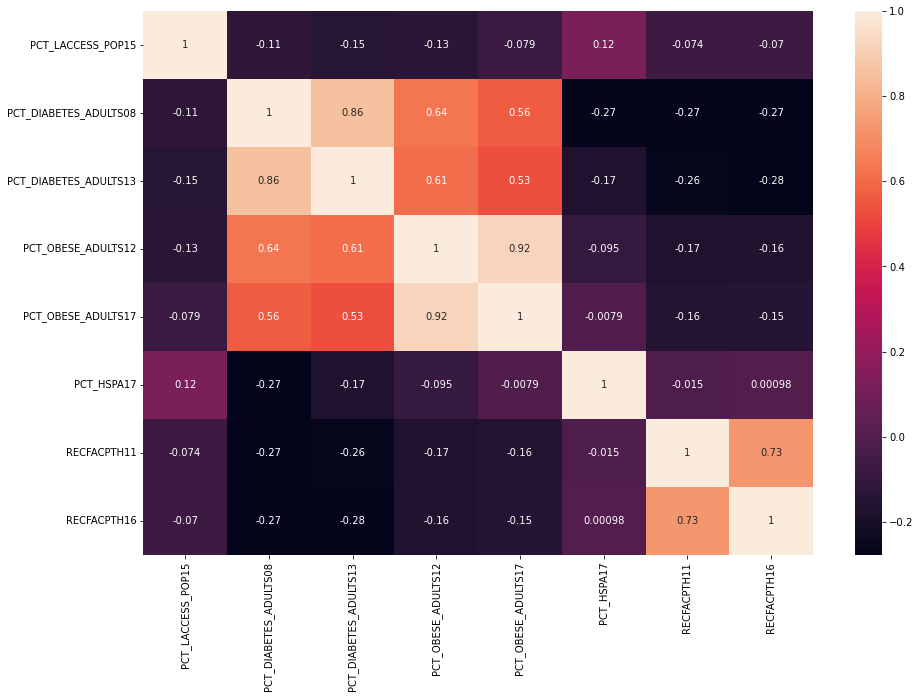

In [254]:
corr_matrix2 = health_food.corr()
fig, ax = plt.subplots(figsize=(15,10))  
sn.heatmap(corr_matrix2, annot=True, ax=ax)
plt.show()

This heatmap shows the correlations between percent access to stores and the health data included in the Food Environment Atlas

array([[<AxesSubplot:xlabel='PCT_LACCESS_POP15', ylabel='PCT_LACCESS_POP15'>,
        <AxesSubplot:xlabel='PCT_DIABETES_ADULTS08', ylabel='PCT_LACCESS_POP15'>,
        <AxesSubplot:xlabel='PCT_DIABETES_ADULTS13', ylabel='PCT_LACCESS_POP15'>,
        <AxesSubplot:xlabel='PCT_OBESE_ADULTS12', ylabel='PCT_LACCESS_POP15'>,
        <AxesSubplot:xlabel='PCT_OBESE_ADULTS17', ylabel='PCT_LACCESS_POP15'>,
        <AxesSubplot:xlabel='PCT_HSPA17', ylabel='PCT_LACCESS_POP15'>,
        <AxesSubplot:xlabel='RECFACPTH11', ylabel='PCT_LACCESS_POP15'>,
        <AxesSubplot:xlabel='RECFACPTH16', ylabel='PCT_LACCESS_POP15'>],
       [<AxesSubplot:xlabel='PCT_LACCESS_POP15', ylabel='PCT_DIABETES_ADULTS08'>,
        <AxesSubplot:xlabel='PCT_DIABETES_ADULTS08', ylabel='PCT_DIABETES_ADULTS08'>,
        <AxesSubplot:xlabel='PCT_DIABETES_ADULTS13', ylabel='PCT_DIABETES_ADULTS08'>,
        <AxesSubplot:xlabel='PCT_OBESE_ADULTS12', ylabel='PCT_DIABETES_ADULTS08'>,
        <AxesSubplot:xlabel='PCT_OBESE_ADULTS17

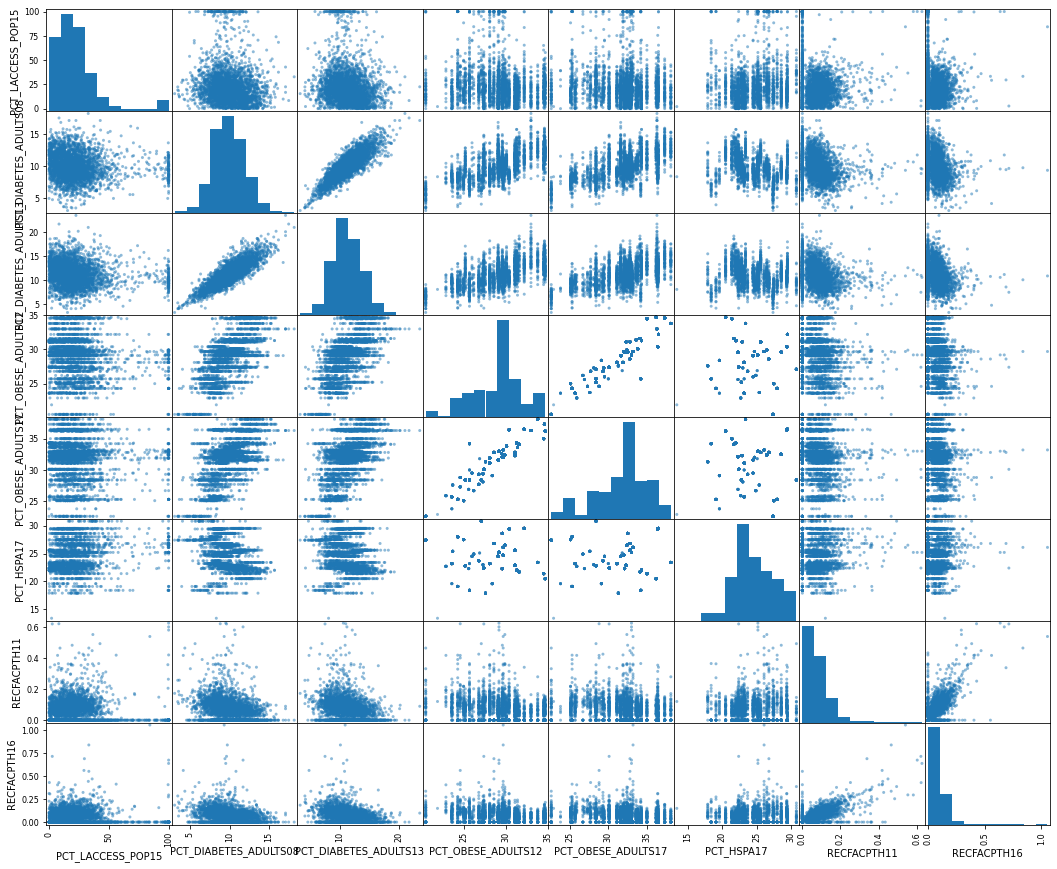

In [255]:
from pandas.plotting import scatter_matrix
scatter_matrix(health_food, figsize=(18,15))